In [20]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='xLvYJ05y5mLrLZKjoIb7bd_3q1_z5f1sHsep8VZgcAu7',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu-gb.cloud-object-storage.appdomain.cloud')

bucket = 'stackoverflowtags-donotdelete-pr-nh6mzw0c0pt7mh'
object_key = 'Questions_ID-score-title-body.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()




Id  Score                                              Title  \
0   80     26  SQLStatement.execute() - multiple queries in o...   
1   90    144  Good branching and merging tutorials for Torto...   
2  120     21                                  ASP.NET Site Maps   
3  180     53                 Function for creating color wheels   
4  260     49  Adding scripting functionality to .NET applica...   

                                                Body  
0  <p>I've written a database generation script i...  
1  <p>Are there any really good tutorials explain...  
2  <p>Has anyone got experience creating <strong>...  
3  <p>This is something I've pseudo-solved many t...  
4  <p>I have a little game written in C#. It uses...

In [5]:
def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='xLvYJ05y5mLrLZKjoIb7bd_3q1_z5f1sHsep8VZgcAu7',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu-gb.cloud-object-storage.appdomain.cloud')

bucket = 'stackoverflowtags-donotdelete-pr-nh6mzw0c0pt7mh'
object_key = 'Tags.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

tags = pd.read_csv(body)
tags.head()



Id             Tag
0  80            flex
1  80  actionscript-3
2  80             air
3  90             svn
4  90     tortoisesvn

In [12]:
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 30.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 771.9/771.9 kB 56.8 MB/s eta 0:00:00


In [13]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup

import re
import nltk
from nltk.tokenize import ToktokTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation

**Merging Questions.csv and Tags.csv**

First group tags by id and then merge.

In [14]:
tags['Tag'] = tags['Tag'].astype(str)

In [15]:
tags = tags.groupby("Id")['Tag'].apply(lambda tags: ' '.join(tags))

Convert the Series back into a DataFrame and add a new default integer index.

In [16]:
tags.reset_index()

Id                                             Tag
0              80                         flex actionscript-3 air
1              90    svn tortoisesvn branch branching-and-merging
2             120                             sql asp.net sitemap
3             180  algorithm language-agnostic colors color-space
4             260         c# .net scripting compiler-construction
...           ...                                             ...
1264211  40143210                                   php .htaccess
1264212  40143300                                 google-bigquery
1264213  40143340                          android android-studio
1264214  40143360                               javascript vue.js
1264215  40143380                                 npm mocha babel

[1264216 rows x 2 columns]

In [17]:
tags = pd.DataFrame({'Id':tags.index, 'Tags':tags.values})

In [18]:
tags.head()

Id                                            Tags
0   80                         flex actionscript-3 air
1   90    svn tortoisesvn branch branching-and-merging
2  120                             sql asp.net sitemap
3  180  algorithm language-agnostic colors color-space
4  260         c# .net scripting compiler-construction

Now we drop unrelated columns from Question.csv

Drop the questions with score less than 6

In [21]:
df = df.merge(tags, on='Id')

Drop the ID and Score columns now

In [22]:
df.drop(columns=['Id', 'Score'], inplace=True)

In [23]:
df.head()

Title  \
0  SQLStatement.execute() - multiple queries in o...   
1  Good branching and merging tutorials for Torto...   
2                                  ASP.NET Site Maps   
3                 Function for creating color wheels   
4  Adding scripting functionality to .NET applica...   

                                                Body  \
0  <p>I've written a database generation script i...   
1  <p>Are there any really good tutorials explain...   
2  <p>Has anyone got experience creating <strong>...   
3  <p>This is something I've pseudo-solved many t...   
4  <p>I have a little game written in C#. It uses...   

                                             Tags  
0                         flex actionscript-3 air  
1    svn tortoisesvn branch branching-and-merging  
2                             sql asp.net sitemap  
3  algorithm language-agnostic colors color-space  
4         c# .net scripting compiler-construction

In [24]:
print((df.isnull().sum() / len(df)) * 100)
# No missing values

Title    0.0
Body     0.0
Tags     0.0
dtype: float64


**Choosing most common tags**

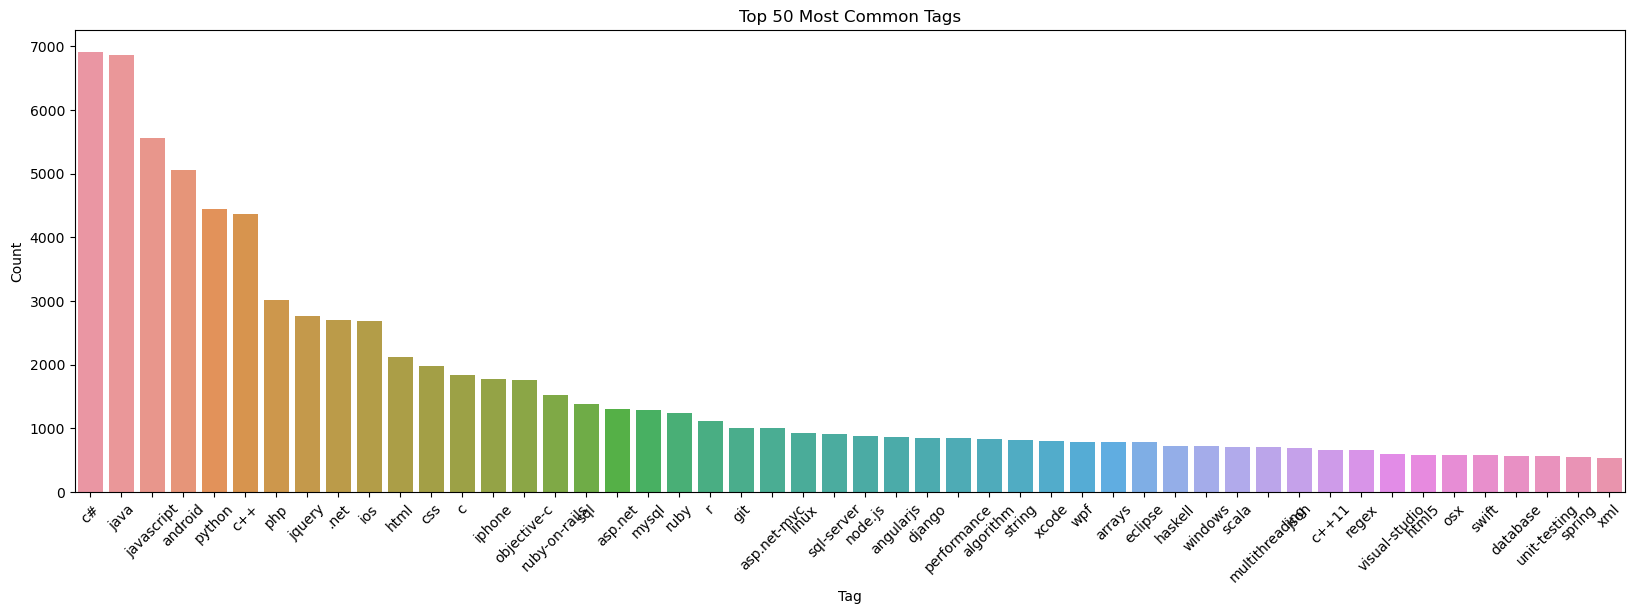

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


tag_counts = df['Tags'].str.split().explode().value_counts()
plt.figure(figsize=(20, 6))
sns.barplot(x=tag_counts.index[:50], y=tag_counts.values[:50])
plt.title('Top 50 Most Common Tags')
plt.xlabel('Tag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [26]:
df['Tags'] = df['Tags'].apply(lambda x: x.split())

In [27]:
f_list = [item for sublist in df['Tags'].values for item in sublist]
imp = nltk.FreqDist(f_list)
count = imp.most_common(200)
top_tags = [word[0] for word in count]

In [28]:
top_tags

['c#',
 'java',
 'javascript',
 'android',
 'python',
 'c++',
 'php',
 'jquery',
 '.net',
 'ios',
 'html',
 'css',
 'c',
 'iphone',
 'objective-c',
 'ruby-on-rails',
 'sql',
 'asp.net',
 'mysql',
 'ruby',
 'r',
 'git',
 'asp.net-mvc',
 'linux',
 'sql-server',
 'node.js',
 'angularjs',
 'django',
 'performance',
 'algorithm',
 'string',
 'xcode',
 'arrays',
 'wpf',
 'eclipse',
 'haskell',
 'windows',
 'scala',
 'multithreading',
 'json',
 'c++11',
 'regex',
 'visual-studio',
 'html5',
 'osx',
 'swift',
 'database',
 'unit-testing',
 'spring',
 'xml',
 'bash',
 'ajax',
 'delphi',
 'cocoa-touch',
 'ruby-on-rails-3',
 'visual-studio-2010',
 'linq',
 'debugging',
 'generics',
 'perl',
 'entity-framework',
 'mongodb',
 'winforms',
 'cocoa',
 'security',
 'postgresql',
 'css3',
 'templates',
 'twitter-bootstrap',
 'shell',
 'list',
 'google-chrome',
 'vim',
 'oop',
 'image',
 'hibernate',
 'gcc',
 'asp.net-mvc-3',
 'facebook',
 'oracle',
 'rest',
 'maven',
 'http',
 'exception',
 'tsql',
 'ma

In [29]:
def common(tags):
    tags_f = []
    for i in range(0, len(tags)):
        if tags[i] in top_tags:
            tags_f.append(tags[i])
    return tags_f

In [30]:
df['Tags'] = df['Tags'].apply(lambda x: common(x))
df['Tags'] = df['Tags'].apply(lambda x: x if len(x)>0 else None)

In [31]:
df.dropna(subset=['Tags'], inplace=True)

**Cleansing Body content**

In [32]:
# Remove HTML Formatting
df['Body'] = df['Body'].apply(lambda x: BeautifulSoup(x).get_text())

In [33]:
# Clean the text
def processed_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub(r"\'\n", " ", text)
    text = re.sub(r"\'\xa0", " ", text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [34]:
df['Body'] = df['Body'].apply(lambda x: processed_text(x)) 

In [35]:
token=ToktokTokenizer()
punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~'

In [36]:
def rem_whitespaces(mylist):
    newlist = [item.strip() if isinstance(item, str) else item for item in mylist]
    return [item for item in newlist if item != '']


In [37]:
def clean_punct1(text): 
    words=token.tokenize(text)
    punctuation_filtered = []
    regex = re.compile('[%s]' % re.escape(punct))
    remove_punctuation = str.maketrans(' ', ' ', punct)
    for w in words:
        if w in top_tags:
            punctuation_filtered.append(w)
        else:
            punctuation_filtered.append(regex.sub('', w))
  
    filtered_list = rem_whitespaces(punctuation_filtered)
        
    return ' '.join(map(str, filtered_list))

In [38]:
df['Body'] = df['Body'].apply(lambda x: clean_punct1(x)) 

In [39]:
def remove_stop_words(text):
    stop_words = set(stopwords.words("english"))
    words=token.tokenize(text)
    filtered = [w for w in words if not w in stop_words]
    return ' '.join(map(str, filtered))

In [41]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/wsuser/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [42]:
df['Body'] = df['Body'].apply(lambda x: remove_stop_words(x)) 

In [43]:
df['Title'] = df['Title'].apply(lambda x: str(x))
df['Title'] = df['Title'].apply(lambda x: processed_text(x)) 
df['Title'] = df['Title'].apply(lambda x: clean_punct1(x))
df['Title'] = df['Title'].apply(lambda x: remove_stop_words(x)) 

In [44]:
df

Title  \
1          good branching merging tutorials tortoisesvn   
2                                     asp.net site maps   
3                        function creating color wheels   
4      adding scripting functionality .net applications   
5                               use nested classes case   
...                                                 ...   
72945                         use dict subset dataframe   
72946  way use itertools python clean nested iterations   
72947      force file ordering f# projects using vscode   
72948             result data returned void gets broken   
72949              exactly makes type system consistent   

                                                    Body  \
1      really good tutorials explaining branching mer...   
2      anyone got experience creating sql-based asp.n...   
3      something pseudo-solved many times never quite...   
4      little game written c uses database back-end t...   
5      working collection classes used video playback...   
...                                                  ...   
72945  say given dataframe columns categorical data d...   
72946  let say following code 123 b 246 c 357 j b k c...   
72947  trying work vscode websharper project ionide p...   
72948  working project huge legacy code base trying r...   
72949  taken andrã ¡ kovã ¡ cs dbindexhs simple imple...   

                                           Tags  
1                                         [svn]  
2                                [sql, asp.net]  
3                [algorithm, language-agnostic]  
4             [c#, .net, compiler-construction]  
5                             [c++, oop, class]  
...                                         ...  
72945                          [python, pandas]  
72946                                  [python]  
72947                                      [f#]  
72948                                     [c++]  
72949  [haskell, types, functional-programming]  

[66256 rows x 3 columns]

**Merge Title and Body**

In [45]:
df['Questions'] = df['Title'] + ' ' + df['Body']

In [46]:
df.drop(columns=['Title', 'Body'], inplace=True)

In [47]:
new_order = ['Questions', 'Tags']  # Define the desired column order

df = df[new_order]

In [48]:
df

Questions  \
1      good branching merging tutorials tortoisesvn r...   
2      asp.net site maps anyone got experience creati...   
3      function creating color wheels something pseud...   
4      adding scripting functionality .net applicatio...   
5      use nested classes case working collection cla...   
...                                                  ...   
72945  use dict subset dataframe say given dataframe ...   
72946  way use itertools python clean nested iteratio...   
72947  force file ordering f# projects using vscode t...   
72948  result data returned void gets broken working ...   
72949  exactly makes type system consistent taken and...   

                                           Tags  
1                                         [svn]  
2                                [sql, asp.net]  
3                [algorithm, language-agnostic]  
4             [c#, .net, compiler-construction]  
5                             [c++, oop, class]  
...                                         ...  
72945                          [python, pandas]  
72946                                  [python]  
72947                                      [f#]  
72948                                     [c++]  
72949  [haskell, types, functional-programming]  

[66256 rows x 2 columns]

In [50]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 18.5 MB/s eta 0:00:00


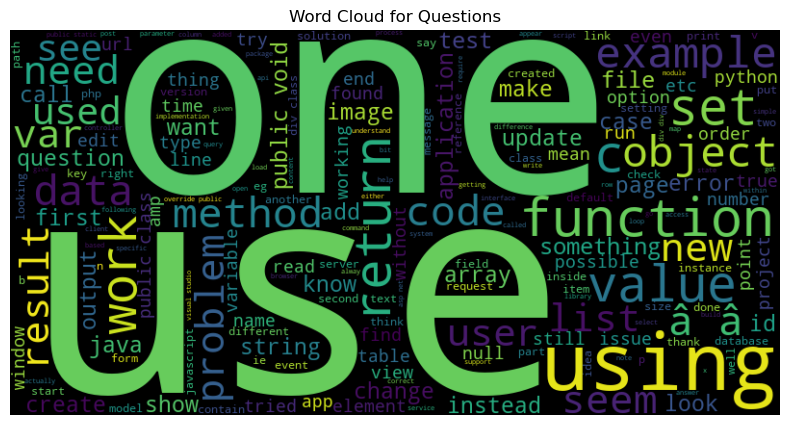

In [51]:
from wordcloud import WordCloud

question_text = ' '.join(df['Questions'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(question_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Questions')
plt.axis('off')
plt.show()

In [52]:
selected_columns = ['Questions', 'Tags'] 
df[selected_columns].to_csv('processed_data.csv', index=False)

# Training Model

In [54]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='xLvYJ05y5mLrLZKjoIb7bd_3q1_z5f1sHsep8VZgcAu7',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu-gb.cloud-object-storage.appdomain.cloud')

bucket = 'stackoverflowtags-donotdelete-pr-nh6mzw0c0pt7mh'
object_key = 'processed_data.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()



Questions  \
0  good branching merging tutorials tortoisesvn r...   
1  asp.net site maps anyone got experience creati...   
2  function creating color wheels something pseud...   
3  adding scripting functionality .net applicatio...   
4  use nested classes case working collection cla...   

                                      Tags  
0                                  ['svn']  
1                       ['sql', 'asp.net']  
2       ['algorithm', 'language-agnostic']  
3  ['c#', '.net', 'compiler-construction']  
4                  ['c++', 'oop', 'class']

In [55]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import confusion_matrix

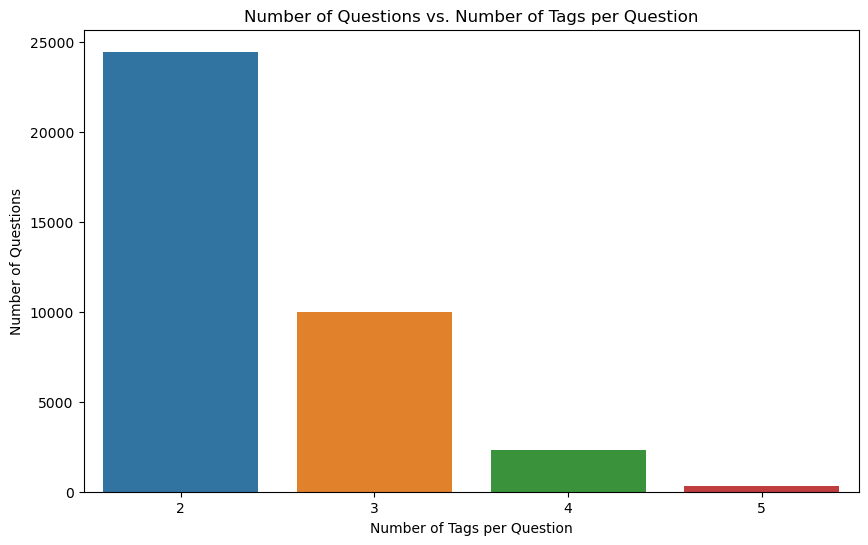

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Tag_Count'] = df['Tags'].str.split().apply(len)
questions_with_multiple_tags = df[df['Tag_Count'] > 1]

plt.figure(figsize=(10, 6))
sns.countplot(data=questions_with_multiple_tags, x='Tag_Count')
plt.xlabel('Number of Tags per Question')
plt.ylabel('Number of Questions')
plt.title('Number of Questions vs. Number of Tags per Question')

plt.show()


In [57]:
type(df['Tags'][0])

str

In [58]:
df['Tags'][0]

"['svn']"

In [59]:
import ast
ast.literal_eval(df['Tags'][0])

['svn']

In [60]:
df['Tags'] = df['Tags'].apply(lambda x: ast.literal_eval(x))
df.head()

Questions  \
0  good branching merging tutorials tortoisesvn r...   
1  asp.net site maps anyone got experience creati...   
2  function creating color wheels something pseud...   
3  adding scripting functionality .net applicatio...   
4  use nested classes case working collection cla...   

                                Tags  Tag_Count  
0                              [svn]          1  
1                     [sql, asp.net]          2  
2     [algorithm, language-agnostic]          2  
3  [c#, .net, compiler-construction]          3  
4                  [c++, oop, class]          3

In [61]:
y = df['Tags']
y

0                                           [svn]
1                                  [sql, asp.net]
2                  [algorithm, language-agnostic]
3               [c#, .net, compiler-construction]
4                               [c++, oop, class]
                           ...                   
66251                            [python, pandas]
66252                                    [python]
66253                                        [f#]
66254                                       [c++]
66255    [haskell, types, functional-programming]
Name: Tags, Length: 66256, dtype: object

In [62]:
multilabel = MultiLabelBinarizer()
y = multilabel.fit_transform(df['Tags'])
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [63]:
multilabel.classes_

array(['.net', 'ajax', 'algorithm', 'amazon-web-services', 'android',
       'android-layout', 'android-studio', 'angularjs', 'apache', 'api',
       'arrays', 'asp.net', 'asp.net-mvc', 'asp.net-mvc-3',
       'asp.net-mvc-4', 'asynchronous', 'authentication', 'azure', 'bash',
       'boost', 'browser', 'c', 'c#', 'c++', 'c++11', 'caching',
       'casting', 'class', 'clojure', 'cocoa', 'cocoa-touch',
       'coding-style', 'collections', 'command-line',
       'compiler-construction', 'constructor', 'cordova', 'css', 'css3',
       'data-structures', 'database', 'date', 'datetime', 'debugging',
       'delphi', 'dependency-injection', 'design', 'design-patterns',
       'dictionary', 'django', 'dom', 'eclipse', 'emacs', 'email',
       'entity-framework', 'enums', 'events', 'excel', 'exception',
       'exception-handling', 'f#', 'facebook', 'file', 'firefox', 'forms',
       'function', 'functional-programming', 'gcc', 'generics', 'ggplot2',
       'git', 'github', 'go', 'google-app-

In [64]:
pd.DataFrame(y, columns = multilabel.classes_)

.net  ajax  algorithm  amazon-web-services  android  android-layout  \
0         0     0          0                    0        0               0   
1         0     0          0                    0        0               0   
2         0     0          1                    0        0               0   
3         1     0          0                    0        0               0   
4         0     0          0                    0        0               0   
...     ...   ...        ...                  ...      ...             ...   
66251     0     0          0                    0        0               0   
66252     0     0          0                    0        0               0   
66253     0     0          0                    0        0               0   
66254     0     0          0                    0        0               0   
66255     0     0          0                    0        0               0   

       android-studio  angularjs  apache  api  ...  visual-studio-2012  wcf  \
0                   0          0       0    0  ...                   0    0   
1                   0          0       0    0  ...                   0    0   
2                   0          0       0    0  ...                   0    0   
3                   0          0       0    0  ...                   0    0   
4                   0          0       0    0  ...                   0    0   
...               ...        ...     ...  ...  ...                 ...  ...   
66251               0          0       0    0  ...                   0    0   
66252               0          0       0    0  ...                   0    0   
66253               0          0       0    0  ...                   0    0   
66254               0          0       0    0  ...                   0    0   
66255               0          0       0    0  ...                   0    0   

       web-services  winapi  windows  winforms  wpf  xaml  xcode  xml  
0                 0       0        0         0    0     0      0    0  
1                 0       0        0         0    0     0      0    0  
2                 0       0        0         0    0     0      0    0  
3                 0       0        0         0    0     0      0    0  
4                 0       0        0         0    0     0      0    0  
...             ...     ...      ...       ...  ...   ...    ...  ...  
66251             0       0        0         0    0     0      0    0  
66252             0       0        0         0    0     0      0    0  
66253             0       0        0         0    0     0      0    0  
66254             0       0        0         0    0     0      0    0  
66255             0       0        0         0    0     0      0    0  

[66256 rows x 200 columns]

In [65]:
tfidf = TfidfVectorizer(analyzer = 'word',min_df=0.0, max_df = 1.0, strip_accents = None, encoding = 'utf-8', preprocessor=None, token_pattern=r"(?u)\S\S+",max_features=10000)
X = tfidf.fit_transform(df['Questions'])
X.shape, y.shape

((66256, 10000), (66256, 200))

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [67]:
sgd = SGDClassifier()
lr = LogisticRegression(solver='lbfgs')
perceptron = Perceptron()
pac = PassiveAggressiveClassifier()
svc = LinearSVC()
mlpc = MLPClassifier()
rfc = RandomForestClassifier()

In [68]:
def jaccard_score(y_true, y_pred):
  jaccard = np.minimum(y_true, y_pred).sum(axis = 1)/np.maximum(y_true, y_pred).sum(axis = 1)
  return jaccard.mean()*100


def print_score(y_pred, clf):
  print("Clf: ", clf.__class__.__name__)
  print('Jacard score: {}'.format(jaccard_score(y_test, y_pred)))
  print('----')

In [69]:
sgdclf = OneVsRestClassifier(sgd)
sgdclf.fit(X_train, y_train)
y_pred = sgdclf.predict(X_test)
print_score(y_pred, sgd)

Clf:  SGDClassifier
Jacard score: 37.59432538484757
----


In [70]:
logistic = OneVsRestClassifier(lr)
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
print_score(y_pred, lr)

Clf:  LogisticRegression
Jacard score: 38.06305966395009
----


In [71]:
percep = OneVsRestClassifier(perceptron)
percep.fit(X_train, y_train)
y_pred = percep.predict(X_test)
print_score(y_pred, perceptron)

Clf:  Perceptron
Jacard score: 44.783653500639616
----


In [74]:
pacclf = OneVsRestClassifier(pac)
pacclf.fit(X_train, y_train)
y_pred = pacclf.predict(X_test)
print_score(y_pred, pac)

Clf:  PassiveAggressiveClassifier
Jacard score: 47.472151553045
----


In [72]:
classifier = LinearSVC(C=1.5, penalty = 'l1', dual=False, max_iter=10000)
svcclf2 = OneVsRestClassifier(classifier)
svcclf2.fit(X_train, y_train)
y_pred = svcclf2.predict(X_test)
print_score(y_pred, classifier)

Clf:  LinearSVC
Jacard score: 51.58026461414629
----


In [ ]:
"""param_grid = {
    'estimator__C':[1,10,100,1000]
}
from sklearn.model_selection import GridSearchCV

svc = OneVsRestClassifier(LinearSVC())
grid_search = GridSearchCV(
    estimator=svc, param_grid=param_grid, cv= 5, verbose=10, scoring=make_scorer(jaccard_score, greater_is_better=True)
)
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print_score(y_pred, best_model)"""

In [35]:
mlpc.fit(X_train, y_train)
y_pred = mlpc.predict(X_test)
print_score(y_pred, mlpc)

Clf:  MLPClassifier
Jacard score: 47.69081883161573
----


In [182]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print_score(y_pred, rfc)

Clf:  RandomForestClassifier
Jacard score: 34.17013343194355
----


In [38]:
import pickle
    
with open('tfidf.pkl', 'wb') as model_file:
    pickle.dump((tfidf), model_file)
with open('multilabel.pkl', 'wb') as model_file:
    pickle.dump((multilabel), model_file)
with open('svcclf2.pkl', 'wb') as model_file:
    pickle.dump((svcclf2), model_file)

**Confusion Matrix**

In [13]:
for i in range(y_train.shape[1]):
    print(multilabel.classes_[i])
    print(confusion_matrix(y_test[:,i], y_pred[:,i]))
    print("")

.net
[[10090   265]
 [  346   116]]

ajax
[[10731    20]
 [   39    27]]

algorithm
[[10635    66]
 [   62    54]]

amazon-web-services
[[10775    10]
 [   18    14]]

android
[[9906   80]
 [ 140  691]]

android-layout
[[10739    32]
 [   40     6]]

android-studio
[[10754    16]
 [   16    31]]

angularjs
[[10667    16]
 [   16   118]]

apache
[[10762    13]
 [   17    25]]

api
[[10770    15]
 [   29     3]]

arrays
[[10623    78]
 [   70    46]]

asp.net
[[10471   143]
 [  107    96]]

asp.net-mvc
[[10605    49]
 [   90    73]]

asp.net-mvc-3
[[10735    20]
 [   53     9]]

asp.net-mvc-4
[[10774    16]
 [   21     6]]

asynchronous
[[10778    12]
 [   22     5]]

authentication
[[10764    20]
 [   23    10]]

backbone.js
[[10792     2]
 [   12    11]]

bash
[[10691    39]
 [   33    54]]

boost
[[10780     6]
 [   10    21]]

browser
[[10769    11]
 [   26    11]]

c
[[10366   160]
 [  149   142]]

c#
[[9161  523]
 [ 393  740]]

c++
[[9861  256]
 [ 200  500]]

c++11
[[10687    31]
 

**Test**

In [77]:
title = "Rest API endpoint in flask should return json object"
question = "I have flask app which should return json after pinging api endpoint from postgres-sql server, how can I create a rest api"
test_input = [title + " " + question]
transformed = tfidf.transform(test_input)
xt = transformed

sgdoutput = multilabel.inverse_transform(sgdclf.predict(xt))
logisticop = multilabel.inverse_transform(logistic.predict(xt))
percepop = multilabel.inverse_transform(percep.predict(xt))
pacop = multilabel.inverse_transform(pacclf.predict(xt))
svcop = multilabel.inverse_transform(svcclf2.predict(xt))

print(f"sgdoutput: {sgdoutput}")
print(f"logisticop: {logisticop}")
print(f"percepop: {percepop}")
print(f"pacop: {pacop}")
print(f"svcop: {svcop}")



sgdoutput: [('json', 'python')]
logisticop: [('api', 'json', 'rest')]
percepop: [('api', 'json', 'python', 'rest')]
pacop: [('json', 'python', 'rest')]
svcop: [('json', 'python', 'rest')]


# Pipeline Creation

In [78]:
X = df['Questions']

In [79]:
def pipeline_create(algo):
    clf = OneVsRestClassifier(algo)
    custom_analyzer = 'word'
    custom_min_df = 0.0
    custom_max_df = 1.0
    custom_strip_accents = None
    custom_encoding = 'utf-8'
    custom_preprocessor = None
    custom_token_pattern = r"(?u)\S\S+"
    custom_max_features = 10000
    global pipeline
    pipeline = Pipeline([
        ('vect', CountVectorizer(
            analyzer=custom_analyzer,
            min_df=custom_min_df,  
            max_df=custom_max_df,  
            strip_accents=custom_strip_accents,
            encoding=custom_encoding,
            preprocessor=custom_preprocessor,
            token_pattern=custom_token_pattern,
            max_features=custom_max_features  
        )),
        ('tfidf', TfidfTransformer()),
        ('clf', OneVsRestClassifier(clf))
    ])
        
    pipeline.fit(X, y)
    return pipeline

In [80]:
# Example
percep = pipeline_create(Perceptron())

In [81]:
title = "Rest API endpoint in flask should return json object"
question = "I have flask app which should return json after pinging api endpoint from postgres-sql server, how can I create a rest api"
test_input = [title + " " + question]

tags = percep.predict(test_input)

In [82]:
output = multilabel.inverse_transform(tags)
print(output)

[('json', 'python', 'rest')]


# Deployment
We are going to deploy LinearSVC, PAC, MLPC, Perceptron and Logistic Regression Trained Models

In [83]:
!pip install -U ibm-watson-machine-learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 38.3 MB/s eta 0:00:0000:01
  Attempting uninstall: ibm-watson-machine-learning
    Found existing installation: ibm-watson-machine-learning 1.0.320
    Uninstalling ibm-watson-machine-learning-1.0.320:
      Successfully uninstalled ibm-watson-machine-learning-1.0.320


In [84]:
import ibm_watson_machine_learning
from ibm_watson_machine_learning import APIClient

In [86]:
wml_credentials = {
    "apikey": "16MRj5Wz4U-5kAhjU-SXpftxNQs2CBxQZr3DGxCf3_km",
    "url": "https://eu-gb.ml.cloud.ibm.com"}

In [87]:
wml_client = APIClient(wml_credentials)

In [89]:
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ----------------  ------------------------
ID                                    NAME              CREATED
d7a3d435-e1b9-4591-a343-9fecd1644f67  tag-stack-deploy  2023-09-18T05:04:32.623Z
------------------------------------  ----------------  ------------------------


ID              NAME  \
0  d7a3d435-e1b9-4591-a343-9fecd1644f67  tag-stack-deploy   

                    CREATED  
0  2023-09-18T05:04:32.623Z

In [90]:
space_id = "d7a3d435-e1b9-4591-a343-9fecd1644f67"
wml_client.set.default_space(space_id)

'SUCCESS'

In [91]:
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.2-py3.10')

In [92]:
def deploy(model_name, dep_name, model):
    model_name = model_name
    deployment_name = dep_name
    model = model
    
    metadata = {
    wml_client.repository.ModelMetaNames.NAME: model_name,
    wml_client.repository.ModelMetaNames.TYPE:'scikit-learn_1.1',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid,
}
    model_details = wml_client.repository.store_model(
    model = model,
    meta_props=metadata)
    model_id = wml_client.repository.get_model_id(model_details)
    deployment_props ={
        wml_client.deployments.ConfigurationMetaNames.NAME:deployment_name,
        wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
    
}
    deployment = wml_client.deployments.create(
    artifact_uid = model_id,
    meta_props=deployment_props)

In [94]:
svc = pipeline_create(LinearSVC(C=1.5, penalty = 'l1', dual=False, max_iter=10000))

In [95]:
deploy("svc", "svc_dep", svc)



#######################################################################################

Synchronous deployment creation for uid: '68f51c23-929a-4433-8ffd-36b899731546' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.
.
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='e747f0ff-09e0-4d38-b923-3da973e209e5'
------------------------------------------------------------------------------------------------




In [99]:
tags = svc.predict(["What is python asp  mvc"])
output = multilabel.inverse_transform(tags)
print(output)

[('asp.net-mvc', 'python')]
